<a href="https://colab.research.google.com/github/oytungunes/PythonCodeExamples/blob/main/lenet_gurbuz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import imblearn



import keras
from keras.utils import np_utils
from sklearn.model_selection import KFold, StratifiedKFold

from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
#


import scipy.io
import numpy as np

mat = scipy.io.loadmat('/content/drive/MyDrive/newwdata/lenetspectrogramgurbuz.mat')

In [ ]:
#load data

X = mat['normalizedspectrogram'] 
Y = mat['YTrain'] # numofsample x 1 0s and 1s
X = X.reshape(X.shape[2],X.shape[0],X.shape[1])# 
print(X.shape)# 113x32x 32

(116, 28, 28)


In [ ]:
#%%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.12, random_state=1)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.12, random_state=1)

In [ ]:
#%%
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D, MaxPooling2D
from keras.models import load_model
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import Dropout
from tensorflow.keras import datasets, layers, models

import tensorflow as tf


model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


opt = tf.keras.optimizers.Adam(0.02)

model.compile(loss= 'binary_crossentropy' , optimizer= opt , metrics=[ 'acc' ])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_6 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

Epoch 1/70
2/2 [==============================] - 1s 343ms/step - loss: 0.7486 - acc: 0.4382 - val_loss: 0.7057 - val_acc: 0.3077
Epoch 2/70
2/2 [==============================] - 0s 44ms/step - loss: 0.6941 - acc: 0.5056 - val_loss: 0.7130 - val_acc: 0.3077
Epoch 3/70
2/2 [==============================] - 0s 46ms/step - loss: 0.6977 - acc: 0.5056 - val_loss: 0.7185 - val_acc: 0.3077
Epoch 4/70
2/2 [==============================] - 0s 53ms/step - loss: 0.6950 - acc: 0.5056 - val_loss: 0.7085 - val_acc: 0.3077
Epoch 5/70
2/2 [==============================] - 0s 83ms/step - loss: 0.6934 - acc: 0.5056 - val_loss: 0.7035 - val_acc: 0.3077
Epoch 6/70
2/2 [==============================] - 0s 72ms/step - loss: 0.6930 - acc: 0.5056 - val_loss: 0.6987 - val_acc: 0.3077
Epoch 7/70
2/2 [==============================] - 0s 87ms/step - loss: 0.6928 - acc: 0.5056 - val_loss: 0.6914 - val_acc: 0.6923
Epoch 8/70
2/2 [==============================] - 0s 72ms/step - loss: 0.6930 - acc: 0.4944 - va

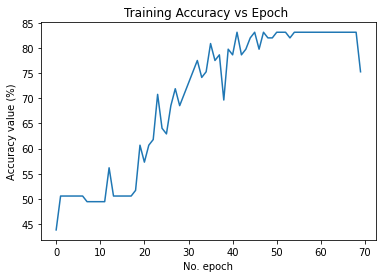

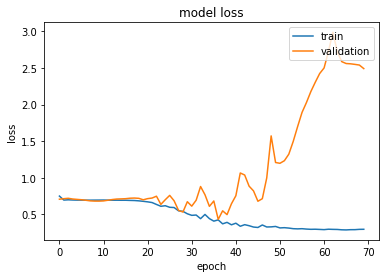

In [ ]:





#numberOfHiddenUnits =15 # calisan 8
#model = Sequential()
#model.add(LSTM(numberOfHiddenUnits))
#model.add(Dense(2, activation='sigmoid'))
#optimizer = keras.optimizers.Adam(lr=0.01)
#model.compile(loss="categorical_crosse#ntropy", optimizer=optimizer, metrics=['acc'])
#model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['acc'])




mycallbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50,verbose=1),
]

history= model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=64,epochs=70,callbacks =[mycallbacks],verbose=1)



#%%

import matplotlib.pyplot as plt

myacc = history.history['acc']
trainingaccuracy= myacc[-1]
accuracy = [x * 100 for x in myacc]

plt.figure(2)
plt.plot(accuracy)
plt.title('Training Accuracy vs Epoch ')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()



# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

model= keras.models.load_model('best_model.h5')

y_hat_classes=(model.predict(X_test) > 0.5).astype("int32")

trainloss, train_acc = model.evaluate(X_train, y_train)
valloss, val_acc = model.evaluate(X_val, y_val)

testloss,test_acc = model.evaluate(X_test,y_test)

print("Train Accuracy",train_acc)
print("Val Accuracy",val_acc)
print("Test Accuracy",test_acc)

list1 = list(y_hat_classes)
list2 = list(y_test)
f1score = f1_score(list2, list1)

print("F1 SCORE",f1score)


1/1 [==============================] - 0s 25ms/step - loss: 0.4288 - acc: 0.7143
Train Accuracy 0.7865168452262878
Val Accuracy 0.692307710647583
Test Accuracy 0.7142857313156128
F1 SCORE 0.8
